# **Independent t-test**

The purpose of an independent t-test is to determine whether there is a statistically significant difference between the means (average values) of two independent groups. This test helps to answer questions like:

- Do two different groups have different average scores on a test?
- Is there a difference in the average heights of men and women?
- Does a new drug produce different effects compared to a placebo?

### Key Points:
- **Independent Groups**: The two groups being compared must be independent of each other (e.g., different people in each group).
- **Means Comparison**: The test compares the means (averages) of the two groups to see if they are significantly different from each other.
- **Statistical Significance**: The test provides a p-value, which indicates whether the observed difference is likely due to chance. If the p-value is below a certain threshold (commonly 0.05), the difference is considered statistically significant.

### Example:
Imagine you want to know if there is a difference in average test scores between two classes of students who were taught using different methods. An independent t-test can be used to compare the average scores of the two classes to see if one method resulted in significantly higher scores than the other.

In [ ]:
#Importing needed libraries

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/Independent Ttest - Mock Exam.csv')

df

,Athlete,Group,Scores
0,1,A,78
1,2,A,81
2,3,A,78
3,4,A,77
4,5,A,79
...,...,...,...
75,76,B,75
76,77,B,74
77,78,B,71
78,79,B,78


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Athlete  80 non-null     int64 
 1   Group    80 non-null     object
 2   Scores   80 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.0+ KB


In [ ]:
df=df.drop('Athlete', axis=1)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Group   80 non-null     object
 1   Scores  80 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
df['Group'].value_counts()

,count
Group,
A,40
B,40


In [ ]:
group1 = df[df['Group']=='A']['Scores']
group2 = df[df['Group']=='B']['Scores']

In [ ]:
group1.info()

<class 'pandas.core.series.Series'>
Index: 40 entries, 0 to 39
Series name: Scores
Non-Null Count  Dtype
--------------  -----
40 non-null     int64
dtypes: int64(1)
memory usage: 640.0 bytes


In [ ]:
group1

,Scores
0,78
1,81
2,78
3,77
4,79
5,75
6,81
7,79
8,83
9,80


In [ ]:
group1.describe()


,Scores
count,40.000000
mean,80.175000
std,3.529273
min,75.000000
25%,77.000000
50%,80.000000
75%,84.000000
max,85.000000


In [ ]:
group2.describe()

,Scores
count,40.000000
mean,72.825000
std,3.020337
min,68.000000
25%,70.750000
50%,72.500000
75%,75.000000
max,78.000000


Code Breakdown for Histogram

plt.figure(figsize=(10, 5)):

This creates a new figure for plotting with a size of 10 inches by 5 inches.
plt.subplot(1, 2, 1):

This adds a subplot to the figure. The subplot(1, 2, 1) call specifies a grid with 1 row and 2 columns and places the first subplot in the first position.
sns.histplot(group1, kde=True):

This creates a histogram for group1 with a KDE overlay using Seaborn's histplot function. The kde=True argument adds the KDE plot.
plt.title('Histogram of Group 1'):

This sets the title of the first subplot to 'Histogram of Group 1'.

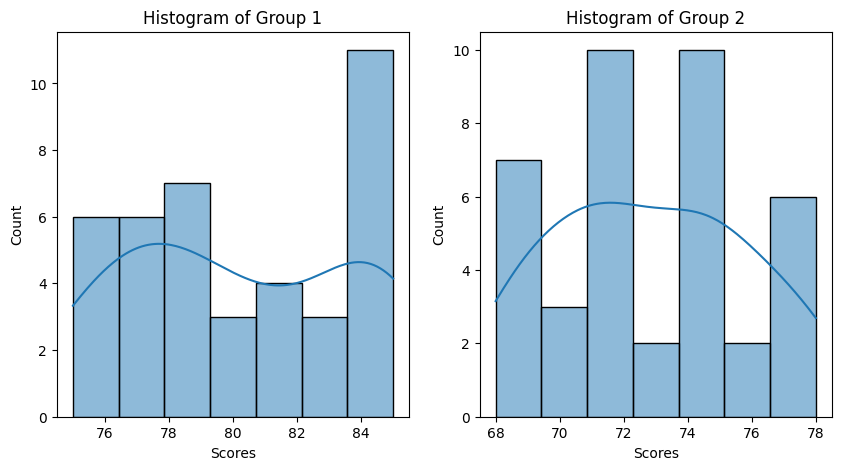

In [ ]:
# Visual inspection using histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(group1, kde=True)
plt.title('Histogram of Group 1')

plt.subplot(1, 2, 2)
sns.histplot(group2, kde=True)
plt.title('Histogram of Group 2')

plt.show()

Code Breakdown for Q-Q plot

plt.figure(figsize=(10, 5)):

This creates a new figure for plotting with a size of 10 inches by 5 inches.
plt.subplot(1, 2, 1):

This adds a subplot to the figure. The subplot(1, 2, 1) call specifies a grid with 1 row and 2 columns and places the first subplot in the first position.
stats.probplot(group1, dist="norm", plot=plt):

This creates a Q-Q plot for group1 using SciPy's probplot function. The dist="norm" argument specifies that the data should be compared to a normal distribution. The plot=plt argument indicates that the plot should be drawn using Matplotlib's plotting functions.
plt.title('Q-Q Plot of Group 1'):

This sets the title of the first subplot to 'Q-Q Plot of Group 1'.

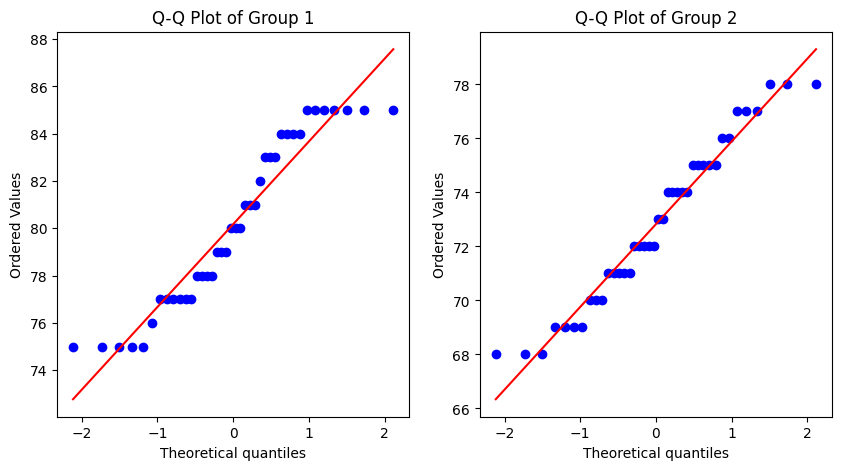

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
stats.probplot(group1, dist="norm", plot=plt)
plt.title('Q-Q Plot of Group 1')

plt.subplot(1, 2, 2)
stats.probplot(group2, dist="norm", plot=plt)
plt.title('Q-Q Plot of Group 2')

plt.show()

In [ ]:
# Statistical test using Shapiro-Wilk test
shapiro_test_group1 = stats.shapiro(group1)
shapiro_test_group2 = stats.shapiro(group2)

print(shapiro_test_group1)
print(shapiro_test_group2)


ShapiroResult(statistic=0.9025920465100052, pvalue=0.00227622171026003)
ShapiroResult(statistic=0.9517847817386071, pvalue=0.08735923735916984)


Findings

*   Group1 is not normally distributed.
*   Group2 is not normally distributed.
*   Variances of group1 and group2 are equal.

In [ ]:
# performing nonparametric test

from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# Notes: alternative can be 'two-sided', 'greater', or 'less'

print("U-statistic:", u_stat)
print("p-value:", p_value)

# What is the decision?

U-statistic: 1507.5
p-value: 8.892664082467265e-12


In [ ]:
# Assuming that the data is normally distributed

t_stat, p_value = stats.ttest_ind(group1, group2)
# note: stats.ttest_ind(group1, group2, equal_var = False) if levene's test is significant, welch ttest

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 10.007133098509591
P-value: 1.2222993392402771e-15
